# How to plot unstructured mesh file on Jupyter Notebook

@tkoyama010 @PyConJP2020

# Introduction

## Who am I ? About @tkoyama010

FEM  library  #getfem commiter & translator 🇯🇵

🖊 qiita.com/tkoyama010

🖊 note.com/tkoyama

❤ ScipyJapan2020(scipyjapan.scipy.org)

## Summary

- Introduction (1 min)
- Using library (4 min)
- Examples (4 min)
- Development of meshioplt (4 min)
- Summary (1 min)
- Questions and answers (1 min)

# Using library
<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="m2_about.jpg" width="40%"></a>
</p>

In [1]:
!cat m.vtk

# vtk DataFile Version 2.0
Exported by getfem++
ASCII
DATASET UNSTRUCTURED_GRID
POINTS 9 float
 0 0 0
 1 0 0
 0 1 0
 1 1 0
 2 0 0
 2 1 0
 0 2 0
 1 2 0
 2 2 0

CELLS 4 20
 4 0 1 3 2
 4 1 4 5 3
 4 2 3 7 6
 4 3 5 8 7

CELL_TYPES 4
 9
 9
 9
 9


# Using library

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-jovyan'


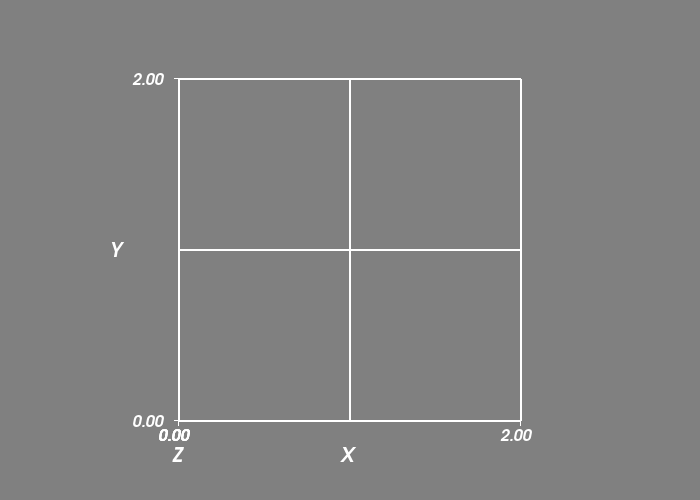

In [3]:
!mayavi2 --offscreen -d m.vtk -m Axes -f ExtractEdges -m Surface \
-s "scene.save('mesh.png', size=(700, 500))"
from IPython.display import Image
Image("mesh.png")

# Using library
<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="https://nschloe.github.io/meshio/logo-with-text.svg" width="40%"></a>
  <a href="https://github.com/matplotlib/matplotlib"><img alt="meshio" src="https://matplotlib.org/_static/logo2.svg" width="40%"></a>
</p>

# Using library
## meshio and matplotlib

In [4]:
import meshio
import matplotlib
import matplotlib.pyplot as plt

# Examples
## plotting unstructured 2D mesh and data

# Examples
## plotting unstructured 2D mesh and data

In [5]:
mesh = meshio.read("m.vtk")

In [6]:
points = mesh.points
cells = mesh.cells

In [7]:
cells

[CellBlock(type='quad', data=array([[0, 1, 3, 2],
        [1, 4, 5, 3],
        [2, 3, 7, 6],
        [3, 5, 8, 7]]))]

In [8]:
figure = plt.figure()
axe = figure.add_subplot(111)
for cell in cells:
    for index in cell.data:
        polygon = plt.Polygon(
            (
                (points[index[0], 0], points[index[0], 1]),
                (points[index[1], 0], points[index[1], 1]),
                (points[index[2], 0], points[index[2], 1]),
                (points[index[3], 0], points[index[3], 1]),
            ),
            edgecolor="black",
            facecolor="gray",
        )
        axe.add_patch(polygon)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.savefig("mesh.png")
plt.close()

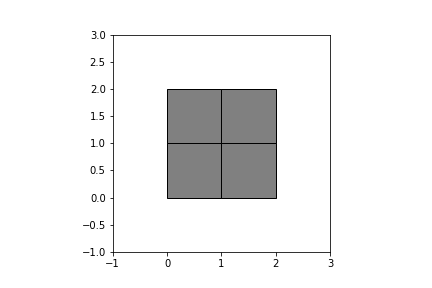

In [9]:
from IPython.display import Image
Image("mesh.png")

# Examples
## plotting unstructured 3D mesh and data

# Examples
## plotting unstructured 3D mesh and data

# development of meshioplt

# What we can do in meshioplt

We can read mesh file and write to AxesSubplot. We can use AxesSubplot as matplotlib's AxesSubplot

# development of meshioplt

In [10]:
from meshioplt import mesh_patches

figure = plt.figure()
axe = figure.add_subplot(111)
patches = mesh_patches("m.vtk")
for patch in patches:
    axe.add_patch(patch)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.savefig("mesh.png")
plt.close()

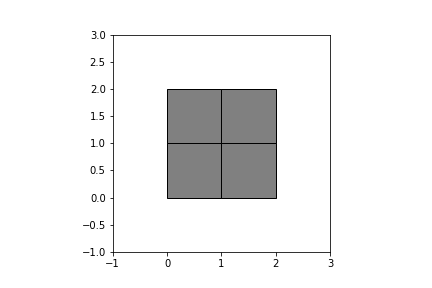

In [11]:
from IPython.display import Image
Image("mesh.png")

# development of meshioplt


<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="https://nschloe.github.io/meshio/logo-with-text.svg" width="40%"></a>
  <a href="https://upload.wikimedia.org/wikipedia/commons/c/c8/Love_Heart_symbol.svg"><img alt="heart" src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Love_Heart_symbol.svg" width="20%"></a>
  <a href="https://github.com/matplotlib/matplotlib"><img alt="meshio" src="https://matplotlib.org/_static/logo2.svg" width="40%"></a>
</p>

# Summary
- Introduction (1 min)
- Using library (4 min)
- Examples (4 min)
- Development of meshioplt (4 min)
- Summary (1 min)
- Questions and answers (1 min)

# Questions and answers